1.1 A1. Data Types & Attributes

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
# Penguins dataset(new iris)
df = pd.read_csv("penguins_lter.csv")
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


Nominal (labels, no order):
Species(Названия видов — это категории без упорядоченности),
Island(Названия островов являются просто метками местоположения, между ними нет естественного порядка), 
sex(Категориальная переменная (самец/самка), между значениями нет порядка)

Ordinal(ordered):
Date egg

Continuous(any value in range):
Culmen Length (mm)(Измеряется в миллиметрах, может принимать любые вещественные значения в диапазоне),
Culmen Depth (mm) (Физическая величина, измеряемая с точностью до долей миллиметра, поэтому шкала непрерывная)

Discrete(countable):
Flipper Length (mm)(Записывается в целых миллиметрах, то есть значения считаемые и не могут иметь дробных частей),
Body Mass (g) (Указывается в целых граммах, поэтому фактически представляет собой счётное значение, хотя и отражает физическую массу)

1.2 A2. Descriptive Statistics 

In [3]:
mean_of_bodymass = df["Body Mass (g)"].mean()
median_of_bodymass = df["Body Mass (g)"].median()
mode_of_bodymass = df["Body Mass (g)"].mode().iloc[0]
range_of_bodymass = df["Body Mass (g)"].max() - df["Body Mass (g)"].min()
var_of_bodymass = df["Body Mass (g)"].var()
std_of_bodymass = df["Body Mass (g)"].std()
Q1 = df["Body Mass (g)"].quantile(0.25)
Q3 = df["Body Mass (g)"].quantile(0.75)
IQR = Q3 - Q1

print({
    "Mean": [mean_of_bodymass],
    "Median": [median_of_bodymass],
    "Mode": [mode_of_bodymass],
    "Range": [range_of_bodymass],
    "Variance": [var_of_bodymass],
    "Standard Deviation": [std_of_bodymass],
    "IQR": [IQR]
})

{'Mean': [4201.754385964912], 'Median': [4050.0], 'Mode': [3800.0], 'Range': [3600.0], 'Variance': [643131.077326748], 'Standard Deviation': [801.9545356980956], 'IQR': [1200.0]}


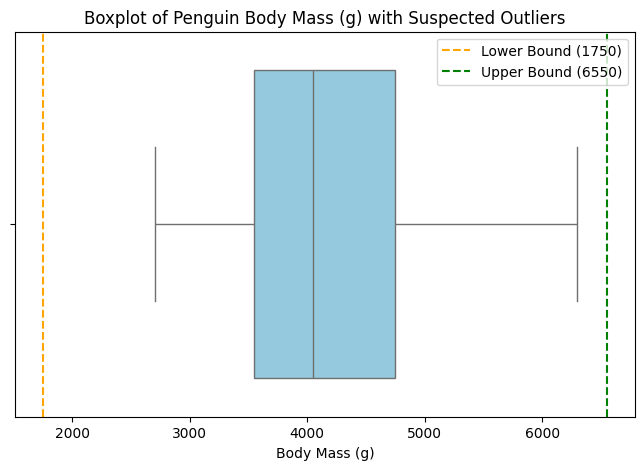

(array([], dtype=float64), 0)

In [4]:
lower_bound = Q1 - 1.5 * IQR
upper_bound =  Q3 + 1.5 * IQR
body_mass = df["Body Mass (g)"]

outliers = body_mass[(body_mass < lower_bound) | (body_mass > upper_bound)]

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Body Mass (g)"], color="skyblue", flierprops={'marker':'o','markerfacecolor':'red','markersize':8})
plt.axvline(lower_bound, color='orange', linestyle='--', label=f'Lower Bound ({lower_bound:.0f})')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({upper_bound:.0f})')
plt.title("Boxplot of Penguin Body Mass (g) with Suspected Outliers")
plt.legend()
plt.show()

outliers.values[:20], len(outliers)

1.3 A3. Handling Missing Data

In [5]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [6]:
# До заполнения
original_mean = df["Delta 15 N (o/oo)"].mean()
original_std = df["Delta 15 N (o/oo)"].std()
original_mean, original_std

In [7]:
# После заполнения константой
df1 = df.copy()
df1["Delta 15 N (o/oo)"] = df1["Delta 15 N (o/oo)"].fillna(0)
after_const_mean = df1["Delta 15 N (o/oo)"].mean()
after_const_std = df1["Delta 15 N (o/oo)"].std()
after_const_mean, after_const_std 

(8.377953372093025, 1.8106538620327561)

In [8]:
# После заполнения средним
df2 = df.copy()
df2["Delta 15 N (o/oo)"] = df2.groupby("Species")["Delta 15 N (o/oo)"].transform(lambda x: x.fillna(x.mean()))
after_mean_mean = df2["Delta 15 N (o/oo)"].mean()
after_mean_std = df2["Delta 15 N (o/oo)"].std()
after_mean_mean, after_mean_std

(8.736394917904153, 0.5431817565455443)

In [9]:
# После заполнения модой
df3 = df.copy()
df3["Delta 15 N (o/oo)"] = df3.groupby("Species")["Delta 15 N (o/oo)"].transform(lambda x: x.fillna(x.mode()[0]))
after_mode_mean = df3["Delta 15 N (o/oo)"].mean()
after_mode_std = df3["Delta 15 N (o/oo)"].std()
after_mode_mean, after_mode_std

(8.693103691860465, 0.5762474926131048)

In [10]:
# После заполнения медианой
df4 = df.copy()
df4["Delta 15 N (o/oo)"] = df4.groupby("Species")["Delta 15 N (o/oo)"].transform(lambda x: x.fillna(x.median()))
after_median_mean = df4["Delta 15 N (o/oo)"].mean()
after_median_std = df4["Delta 15 N (o/oo)"].std()
after_median_mean, after_median_std

(8.737159215116279, 0.543377827901606)

In [11]:
# Predictive
df5 = df.copy()
numeric_cols = df5.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("Delta 15 N (o/oo)")

train = df5.dropna(subset=["Delta 15 N (o/oo)"])
X_train = train[numeric_cols].fillna(train[numeric_cols].mean())
y_train = train["Delta 15 N (o/oo)"]

model = LinearRegression()
model.fit(X_train, y_train)

missing_mask = df5["Delta 15 N (o/oo)"].isna()
X_missing = df5.loc[missing_mask, numeric_cols].fillna(train[numeric_cols].mean())
df5.loc[missing_mask, "Delta 15 N (o/oo)"] = model.predict(X_missing)

In [12]:
after_pred_mean = df5["Delta 15 N (o/oo)"].mean()
after_pred_std = df5["Delta 15 N (o/oo)"].std()
after_pred_mean, after_pred_std 

(8.735260847468881, 0.5443543230418919)

In [17]:
summary = pd.DataFrame({
    "Method": ["Original", "Constant=0", "Mean", "Median", "Predictive"],
    "Mean": [
        original_mean,
        after_const_mean,
        after_mean_mean,
        after_median_mean,
        after_pred_mean
    ],
    "Std Dev": [
        original_std,
        after_const_std,
        after_mean_std,
        after_median_std,
        after_pred_std
    ]
})

summary

,Method,Mean,Std Dev
0,Original,8.733382,0.551770
1,Constant=0,8.377953,1.810654
2,Mean,8.736395,0.543182
3,Median,8.737159,0.543378
4,Predictive,8.735261,0.544354


Constant: просто, но искажает данные -> плохой метод.  
Mean: легко, сохраняет среднее, но уменьшает разброс.  
Median: устойчиво к выбросам, но тоже снижает разброс.  
Mode: берёт типичное значение, но может быть неточным.  
Predictive: учитывает связи между признаками, даёт реалистичные значения -> лучший метод.  

2.1 B1. Normalization & Standardization

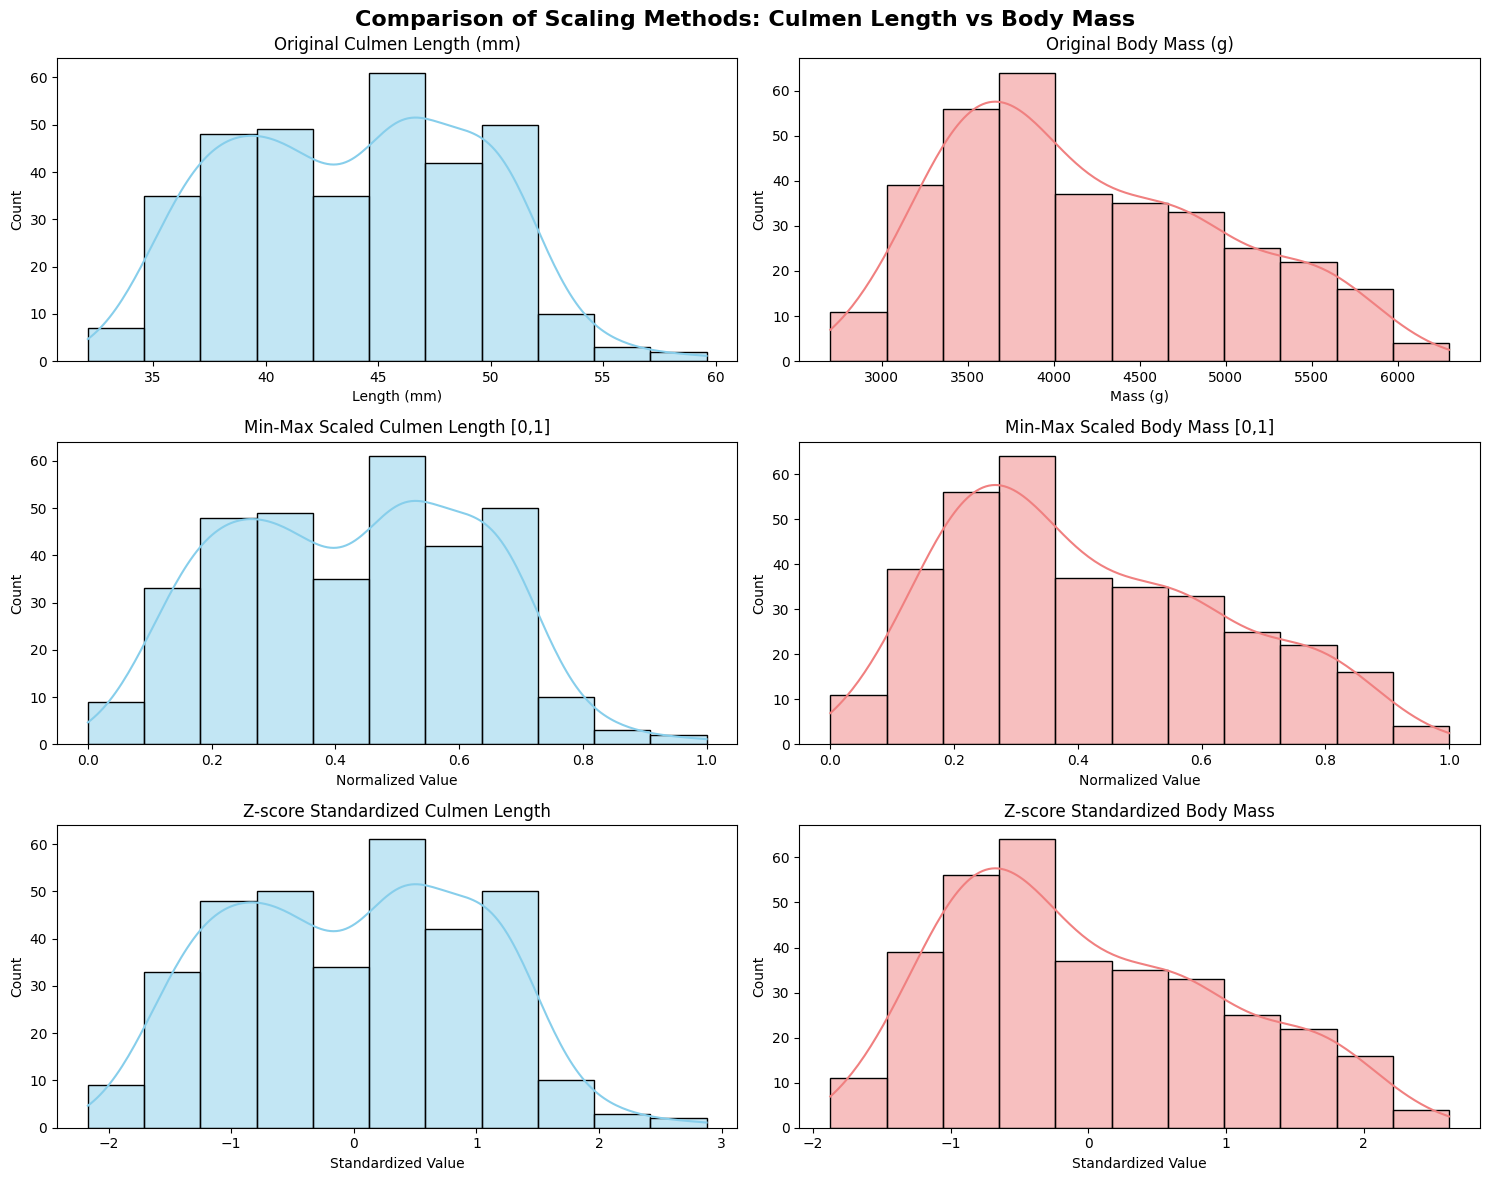

In [28]:
df_clean = df[['Culmen Length (mm)', 'Body Mass (g)']].dropna()

minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

# Min-Max scaling
minmax_scaled = minmax_scaler.fit_transform(df_clean)
df_minmax = pd.DataFrame(minmax_scaled, columns=['Culmen Length (MinMax)', 'Body Mass (MinMax)'])

# Z-score standardization
zscore_scaled = zscore_scaler.fit_transform(df_clean)
df_zscore = pd.DataFrame(zscore_scaled, columns=['Culmen Length (Z-score)', 'Body Mass (Z-score)'])


fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Comparison of Scaling Methods: Culmen Length vs Body Mass', fontsize=16, fontweight='bold')

# MinMax scaler
sns.histplot(df_clean['Culmen Length (mm)'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Original Culmen Length (mm)')
axes[0, 0].set_xlabel('Length (mm)')

sns.histplot(df_clean['Body Mass (g)'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Original Body Mass (g)')
axes[0, 1].set_xlabel('Mass (g)')


sns.histplot(df_minmax['Culmen Length (MinMax)'], kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Min-Max Scaled Culmen Length [0,1]')
axes[1, 0].set_xlabel('Normalized Value')

sns.histplot(df_minmax['Body Mass (MinMax)'], kde=True, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Min-Max Scaled Body Mass [0,1]')
axes[1, 1].set_xlabel('Normalized Value')

# Z-score standardized data
sns.histplot(df_zscore['Culmen Length (Z-score)'], kde=True, ax=axes[2, 0], color='skyblue')
axes[2, 0].set_title('Z-score Standardized Culmen Length')
axes[2, 0].set_xlabel('Standardized Value')

sns.histplot(df_zscore['Body Mass (Z-score)'], kde=True, ax=axes[2, 1], color='lightcoral')
axes[2, 1].set_title('Z-score Standardized Body Mass')
axes[2, 1].set_xlabel('Standardized Value')

plt.tight_layout()
plt.show()

In [29]:
print("SCALING METHOD COMPARISON")


print("\nOriginal Data Statistics:")
print(f"Culmen Length - Mean: {df_clean['Culmen Length (mm)'].mean():.2f}, Std: {df_clean['Culmen Length (mm)'].std():.2f}")
print(f"Body Mass - Mean: {df_clean['Body Mass (g)'].mean():.2f}, Std: {df_clean['Body Mass (g)'].std():.2f}")

print("\nMin-Max Scaled Statistics:")
print(f"Culmen Length - Mean: {df_minmax['Culmen Length (MinMax)'].mean():.3f}, Std: {df_minmax['Culmen Length (MinMax)'].std():.3f}")
print(f"Body Mass - Mean: {df_minmax['Body Mass (MinMax)'].mean():.3f}, Std: {df_minmax['Body Mass (MinMax)'].std():.3f}")

print("\nZ-score Standardized Statistics:")
print(f"Culmen Length - Mean: {df_zscore['Culmen Length (Z-score)'].mean():.3f}, Std: {df_zscore['Culmen Length (Z-score)'].std():.3f}")
print(f"Body Mass - Mean: {df_zscore['Body Mass (Z-score)'].mean():.3f}, Std: {df_zscore['Body Mass (Z-score)'].std():.3f}")

SCALING METHOD COMPARISON

Original Data Statistics:
Culmen Length - Mean: 43.92, Std: 5.46
Body Mass - Mean: 4201.75, Std: 801.95

Min-Max Scaled Statistics:
Culmen Length - Mean: 0.430, Std: 0.199
Body Mass - Mean: 0.417, Std: 0.223

Z-score Standardized Statistics:
Culmen Length - Mean: 0.000, Std: 1.001
Body Mass - Mean: 0.000, Std: 1.001


Min-Max Normalization  
Preferable:  
Нужно сохранить исходную форму распределения данных.  
Алгоритм требует данные в строгом диапазоне (например, нейросети).  
В данных нет больших выбросов.  
Важна простота понимания (все значения от 0 до 1).  

Z-score Standardization  
Preferable:  
В данных есть выбросы (этот метод устойчивее к ним).  
Используются алгоритмы, которые любят данные с нормальным распределением (например, PCA, k-means).  
Работаете с алгоритмами, учитывающими расстояние между точками (k-NN, SVM).  
Нужно чтобы среднее значение стало равно 0, а стандартное отклонение — 1.  

In [31]:
df_clean2 = df[['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Island']].dropna()

df_clean2['Body_Index'] = df_clean2['Body Mass (g)'] / df_clean2['Culmen Length (mm)']

df_clean2

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Island,Body_Index
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0,MALE,Torgersen,95.907928
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0,FEMALE,Torgersen,96.202532
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0,FEMALE,Torgersen,80.645161
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0,FEMALE,Torgersen,94.005450
5,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,190.0,3650.0,MALE,Torgersen,92.875318
...,...,...,...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),47.2,13.7,214.0,4925.0,FEMALE,Biscoe,104.343220
340,Gentoo penguin (Pygoscelis papua),46.8,14.3,215.0,4850.0,FEMALE,Biscoe,103.632479
341,Gentoo penguin (Pygoscelis papua),50.4,15.7,222.0,5750.0,MALE,Biscoe,114.087302
342,Gentoo penguin (Pygoscelis papua),45.2,14.8,212.0,5200.0,FEMALE,Biscoe,115.044248


In [37]:
discretizer_width = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discretizer_freq = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

df_clean2['Mass_Width_Bins'] = discretizer_width.fit_transform(df_clean2[['Body Mass (g)']])
df_clean2['Mass_Freq_Bins'] = discretizer_freq.fit_transform(df_clean2[['Body Mass (g)']])

island_dummies = pd.get_dummies(df_clean2['Island'], prefix='Island')
df_final = pd.concat([df_clean2, island_dummies], axis=1)

df_final

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Island,Body_Index,Mass_Width_Bins,Mass_Freq_Bins,Island_Biscoe,Island_Dream,Island_Torgersen
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0,MALE,Torgersen,95.907928,1.0,1.0,False,False,True
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0,FEMALE,Torgersen,96.202532,1.0,2.0,False,False,True
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0,FEMALE,Torgersen,80.645161,0.0,0.0,False,False,True
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0,FEMALE,Torgersen,94.005450,1.0,0.0,False,False,True
5,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,190.0,3650.0,MALE,Torgersen,92.875318,1.0,1.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),47.2,13.7,214.0,4925.0,FEMALE,Biscoe,104.343220,3.0,3.0,True,False,False
340,Gentoo penguin (Pygoscelis papua),46.8,14.3,215.0,4850.0,FEMALE,Biscoe,103.632479,2.0,3.0,True,False,False
341,Gentoo penguin (Pygoscelis papua),50.4,15.7,222.0,5750.0,MALE,Biscoe,114.087302,4.0,4.0,True,False,False
342,Gentoo penguin (Pygoscelis papua),45.2,14.8,212.0,5200.0,FEMALE,Biscoe,115.044248,3.0,4.0,True,False,False


Эти преобразования помогают сделать данные более "дружелюбными" для моделей машинного обучения. Создание новых признаков может выявить скрытые закономерности, дискретизация упрощает сложные зависимости, а one-hot encoding позволяет работать с категориальными переменными. Выбор конкретных методов зависит от данных и используемой модели.

3.1 C1. Advanced Sampling & Data Quality Analysis (2)